## 1. Setting up

Importing key libraries.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_dir = os.getcwd()[:-13] +'data\'
file_name = 'processed_data.csv'
os.chdir(data_dir)
#Read the data
data = pd.read_csv(file_name)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451325 entries, 0 to 451324
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      451325 non-null  float64
 1   artist_name       451325 non-null  object 
 2   danceability      451325 non-null  float64
 3   duration_m        451325 non-null  float64
 4   energy            451325 non-null  float64
 5   explicit          451325 non-null  object 
 6   instrumentalness  451325 non-null  float64
 7   key               451325 non-null  int64  
 8   liveness          451325 non-null  float64
 9   loudness          451325 non-null  float64
 10  mode              451325 non-null  int64  
 11  month             451325 non-null  int64  
 12  popularity        451325 non-null  float64
 13  preview_url       451325 non-null  object 
 14  speechiness       451325 non-null  float64
 15  tempo             451325 non-null  int64  
 16  track_id          45

## 2. Handling categorical data

Handling of two categorical variables, "key" and "mode," through the application of one-hot encoding. One-hot encoding is a technique that transforms categorical variables into binary vectors, allowing our models to effectively incorporate these categorical attributes into the analysis.

In [ ]:
data = pd.get_dummies(data, columns=['key', 'mode'], drop_first=True) # Creates binary (dummy) variables for each category within the "key" and "mode" columns.

In [ ]:
pd.set_option('display.max_columns', None) #To display all the columns
data.head()

,acousticness,artist_name,danceability,duration_m,energy,explicit,instrumentalness,liveness,loudness,month,popularity,preview_url,speechiness,tempo,track_id,valence,year,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,0.00126,Headhunterz,0.355,2.943667,0.881,f,0.000002,0.0694,-3.962,7,26.0,https://p.scdn.co/mp3-preview/4229181352cb0c16...,0.1800,75,7o7Qx3kulN6A0uOaAPf5Vz,0.190,2022,0,0,0,0,0,0,0,0,1,0,0,1
1,0.18700,Headhunterz,0.552,3.902767,0.829,f,0.000054,0.2830,-4.988,9,51.0,https://p.scdn.co/mp3-preview/4d5c7620737fbd8e...,0.0845,150,0zolxiS5uiL5towOJrsJi4,0.367,2019,0,0,0,0,0,1,0,0,0,0,0,0
2,0.02730,Crossing Colors,0.839,5.818183,0.721,f,0.900000,0.0667,-7.721,7,9.0,https://p.scdn.co/mp3-preview/d8e54d5d229948b9...,0.0477,110,6AJ1Rk1khe1egig27nXImU,0.768,2018,0,0,0,0,0,0,0,0,1,0,0,0
3,0.01430,Brennan Heart,0.543,3.520000,0.827,f,0.000000,0.0842,-3.585,5,46.0,https://p.scdn.co/mp3-preview/a8e60e3bd2defda5...,0.0350,150,2KM4KCDbbfOvQ5cgWADd0Z,0.123,2021,1,0,0,0,0,0,0,0,0,0,0,0
4,0.01080,Brennan Heart,0.623,3.946667,0.832,f,0.000000,0.0487,-3.348,5,17.0,https://p.scdn.co/mp3-preview/758c6b9f2ff9b87b...,0.0566,150,7t2gGVF4Q7QnFM9dt9F0qE,0.439,2021,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

features = ["acousticness", "danceability", "duration_m", "energy", "instrumentalness", "key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9", "key_10", "key_11", "liveness",
            "mode_1", "speechiness", "loudness", "tempo", "valence"]

X = data[features] #data preparation
y = data['popularity'] #target variable

## 3. Categorisation

Making categories for popularity (target variable)

In [ ]:
pd.cut(data['popularity'], bins=3) #Making 3 equal bins

0         (-0.083, 27.667]
1         (27.667, 55.333]
2         (-0.083, 27.667]
3         (27.667, 55.333]
4         (-0.083, 27.667]
                ...       
451320    (-0.083, 27.667]
451321    (-0.083, 27.667]
451322    (-0.083, 27.667]
451323    (-0.083, 27.667]
451324    (-0.083, 27.667]
Name: popularity, Length: 451325, dtype: category
Categories (3, interval[float64, right]): [(-0.083, 27.667] < (27.667, 55.333] < (55.333, 83.0]]

In [ ]:
pd.cut(data['popularity'], bins=3, labels = ["low", "medium", "high"]).value_counts() #value count of the bins

low       436277
medium     14652
high         396
Name: popularity, dtype: int64

In [ ]:
data['label'] = pd.cut(data.popularity, bins=3, labels=["low", "medium", "high"], right=True) #New label for popularity

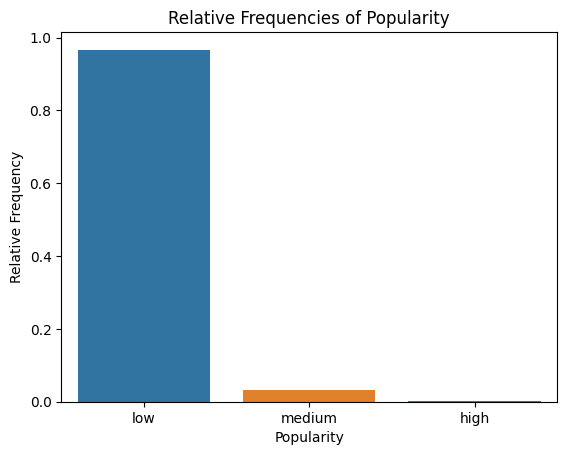


low       0.966658
medium    0.032464
high      0.000877
Name: label, dtype: float64


In [ ]:
# Calculate the relative frequencies
y = data.label
relative_frequencies = y.value_counts() / y.count()

# Create a bar plot
sns.barplot(x=relative_frequencies.index, y=relative_frequencies.values)

# labels and a title
plt.xlabel("Popularity")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Popularity")

# The plot
plt.show()
print("") #For a space
print(relative_frequencies)

Outcomes: The provided distribution of labeled data indicates that the "low" label is characterized by a significantly higher proportion in comparison to the "high" and "medium" labels. In this dataset, the "low" label represents the majority class, accounting for approximately 97% of the data, while the "high" and "medium" labels correspond to the minority classes, comprising roughly 3% and 0.09%, respectively.

Given that the "low" class constitutes the majority class and the "high" and "medium" classes are identified as minority classes, therefore to maintain the uniformity of the data oversampling of the minority classes, namely "high" and "medium" is done in the following cell.

### Oversampling:

**SMOTE**

Synthetic Minority Over-sampling Technique (SMOTE), generate synthetic samples rather than duplicating existing ones. SMOTE can be used in conjunction with normalization to improve the balance and scale the data effectively.

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE resampler
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the feature matrix and target variable
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print(y_resampled.value_counts())
print("-----------------")
print(X_resampled.value_counts())

low       436277
medium    436277
high      436277
Name: label, dtype: int64
-----------------
acousticness  danceability  duration_m  energy  instrumentalness  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  key_10  key_11  liveness  mode_1  speechiness  loudness  tempo  valence
0.00443       0.806         8.147733    0.4690  0.922000          1      0      0      0      0      0      0      0      0      0       0       0.0960    1       0.0521       -12.103   121    0.407      17
0.00306       0.641         3.197750    0.8750  0.000082          0      0      0      0      0      0      0      0      0      0       1       0.3700    0       0.3380       -5.842    140    0.527      13
0.05770       0.458         5.776667    0.8600  0.684000          0      0      0      0      0      0      0      1      0      0       0       0.0767    1       0.0685       -10.134   145    0.217      12
0.12600       0.827         6.474667    0.7680  0.225000          0      0      0  

In [ ]:
# Check the class distribution after SMOTE
y_resampled.value_counts()

low       436277
medium    436277
high      436277
Name: label, dtype: int64

## 4. Normalization

 It's a good practice to normalize (or scale) the features that have different scales or ranges to ensure that they contribute equally to the modeling process. Normalization can improve the performance and convergence of many machine learning algorithms.

 Variables Consider for normalization:



1. duration_ms: It's expect that the length of a song can influence its popularity, thus it is considered for normalization.

2. loudness: It's on a different scale compared to the other features.

3. tempo: Tempo can have a wide range of values, since it's significantly different from the range [0, 1] therefore normalized it.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
X_resampled[['duration_m', 'loudness', 'tempo']] = scaler.fit_transform(X_resampled[['duration_m', 'loudness', 'tempo']])

# The rest of the features remain unchanged

In [ ]:
X_resampled.head()

,acousticness,danceability,duration_m,energy,instrumentalness,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,liveness,mode_1,speechiness,loudness,tempo,valence
0,0.00126,0.355,-0.838201,0.881,0.000002,0,0,0,0,0,0,0,0,1,0,0,0.0694,1,0.1800,0.884494,-2.220444,0.190
1,0.18700,0.552,-0.312968,0.829,0.000054,0,0,0,0,0,1,0,0,0,0,0,0.2830,0,0.0845,0.693599,1.063408,0.367
2,0.02730,0.839,0.735975,0.721,0.900000,0,0,0,0,0,0,0,0,1,0,0,0.0667,0,0.0477,0.185104,-0.687980,0.768
3,0.01430,0.543,-0.522583,0.827,0.000000,1,0,0,0,0,0,0,0,0,0,0,0.0842,0,0.0350,0.954638,1.063408,0.123
4,0.01080,0.623,-0.288927,0.832,0.000000,1,0,0,0,0,0,0,0,0,0,0,0.0487,0,0.0566,0.998733,1.063408,0.439


## 5. Modelling and prediction


1. Recreating the design matrix
2. Making a model
3. Fit the data
4. train the data
5. cross validate




In [ ]:
# Recreating the design matrix
design_features = ['acousticness', 'instrumentalness', 'loudness', 'danceability'] #selected 4 important features
X_resampled = X_resampled[design_features] #take subset of the design_features

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(1308831, 4)
(1308831,)




```
# This is formatted as code
```

## Classification: KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=99, test_size=0.5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.7847959096354612


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=99, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.8003158028778811


In [ ]:
from sklearn.model_selection import cross_val_score
k_range = range(1, 21)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.789192309432458, 0.7624192152383361, 0.769352342725992, 0.7590235981206481, 0.7580565393231917, 0.7518317874542152, 0.7503899322060523, 0.7454083840754002, 0.7430038368120513, 0.7398068712399419, 0.7369231615596847, 0.7340918432594086, 0.7322264917974369, 0.7293591553750072, 0.7272416701243576, 0.7255029302645447, 0.7234542089607261, 0.7216303335403049, 0.7200695066513221, 0.7183351326981438]


In [ ]:
k_range = range(21, 27)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7166826211443758, 0.7156031397507093, 0.713913517228087, 0.7126855934839205, 0.7112873981300877, 0.7099808874589103]


In [ ]:
k_range = range(27, 37)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7088326430774423, 0.707605811340081, 0.7061999759712994, 0.7048803675921309, 0.7038761991839488, 0.702731229256284, 0.7017412497825701, 0.700916085577652, 0.6994764134972478, 0.6987505748060026]


In [ ]:
k_range = range(37, 47)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.697784608063005, 0.6968994121534084, 0.6958155652939032, 0.6951694050241974, 0.6941215770552607, 0.6934612271541523, 0.6924865288778503, 0.6917574150775646, 0.690733599845301, 0.6902817242435964]


In [ ]:
k_range = range(87, 95)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.6677010331933956, 0.6672393339562738, 0.6670330431582042, 0.6667186947770538, 0.6662897401494419, 0.66596229397095, 0.6654427460182072, 0.6651676912613932]


In [ ]:
k_dict=dict(zip(k_range,k_scores))
k_dict

{87: 0.6677010331933956,
 88: 0.6672393339562738,
 89: 0.6670330431582042,
 90: 0.6667186947770538,
 91: 0.6662897401494419,
 92: 0.66596229397095,
 93: 0.6654427460182072,
 94: 0.6651676912613932}

In [ ]:
max(k_dict, key= k_dict.get)

87

Text(0, 0.5, 'Cross-Validated Accuracy')

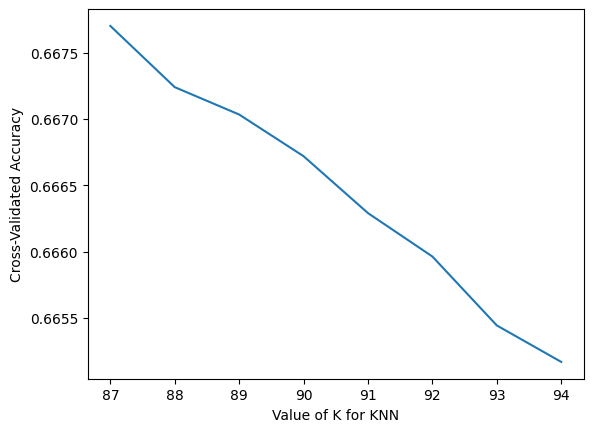

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
k_range = range(107, 115)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.6606478421474649, 0.660331310455595, 0.6599962236664836, 0.6597735603790014, 0.6595126949855382, 0.6591077531779932, 0.6587792156062365, 0.6584648668379004]


Text(0, 0.5, 'Cross-Validated Accuracy')

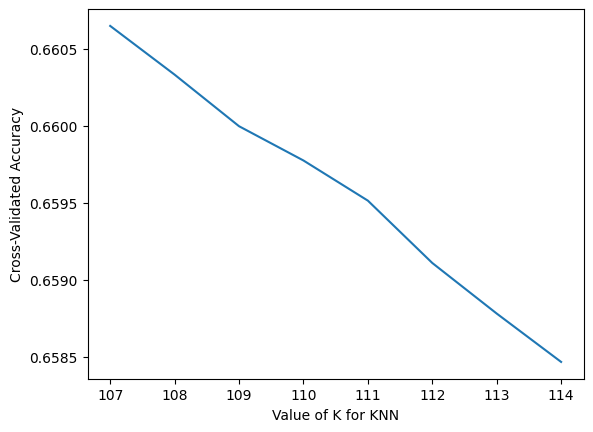

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
k_range2 = range(1, 22)
param_dist = dict(n_neighbors=k_range2)

In [ ]:
rand = RandomizedSearchCV(knn, param_dist, cv=5, scoring='accuracy', n_iter=5, random_state=5)

In [ ]:
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=114),
                   n_iter=5, param_distributions={'n_neighbors': range(1, 22)},
                   random_state=5, scoring='accuracy')

In [ ]:
rand.cv_results_

{'mean_fit_time': array([3.14403558, 3.0739079 , 2.68185196, 2.98015084, 2.71753812]),
 'std_fit_time': array([0.78569602, 0.77604011, 0.61224521, 0.89948181, 0.75236546]),
 'mean_score_time': array([15.37275634, 19.83544879, 19.55183024, 20.12275486, 19.86339421]),
 'std_score_time': array([0.85038828, 0.27284325, 0.43725171, 0.53858944, 0.54222652]),
 'param_n_neighbors': masked_array(data=[3, 18, 20, 21, 19],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 18},
  {'n_neighbors': 20},
  {'n_neighbors': 21},
  {'n_neighbors': 19}],
 'split0_test_score': array([0.7706413 , 0.72101704, 0.71812461, 0.71615995, 0.71939619]),
 'split1_test_score': array([0.76992512, 0.72288197, 0.71973302, 0.71811762, 0.7213266 ]),
 'split2_test_score': array([0.76906285, 0.72048069, 0.71677509, 0.71552533, 0.71897989]),
 'split3_test_score': array([0.76850619, 0.72237442, 0.71887075, 0.71704796, 0

In [ ]:
# The best model
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.769352342725992
{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

        high       0.94      1.00      0.97    131264
         low       0.75      0.65      0.70    130755
      medium       0.70      0.75      0.73    130631

    accuracy                           0.80    392650
   macro avg       0.80      0.80      0.80    392650
weighted avg       0.80      0.80      0.80    392650



In [ ]:
#Fake entry
new_track = pd.DataFrame({
    'acousticness': 0.16,
    'instrumentalness': .003 ,
    'loudness': -1.2,
    'danceability': .2,
}, index=[0])

In [ ]:
import numpy as np
rand = KNeighborsClassifier(n_neighbors=3)
rand.fit(X_train, y_train)
rand.predict(new_track)

array(['low'], dtype=object)